In [1]:
import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

In [2]:
import pandas as pd

fileURL = 'http://archive.ics.uci.edu/ml/\
machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', \
                                   'Petal Length', 'Petal Width', 
                                   'Species'], header=None)
iris = iris.dropna()

> <b> A scatterplot matrix of scatterplots, with one scatterplot for each pairwise combination of features.


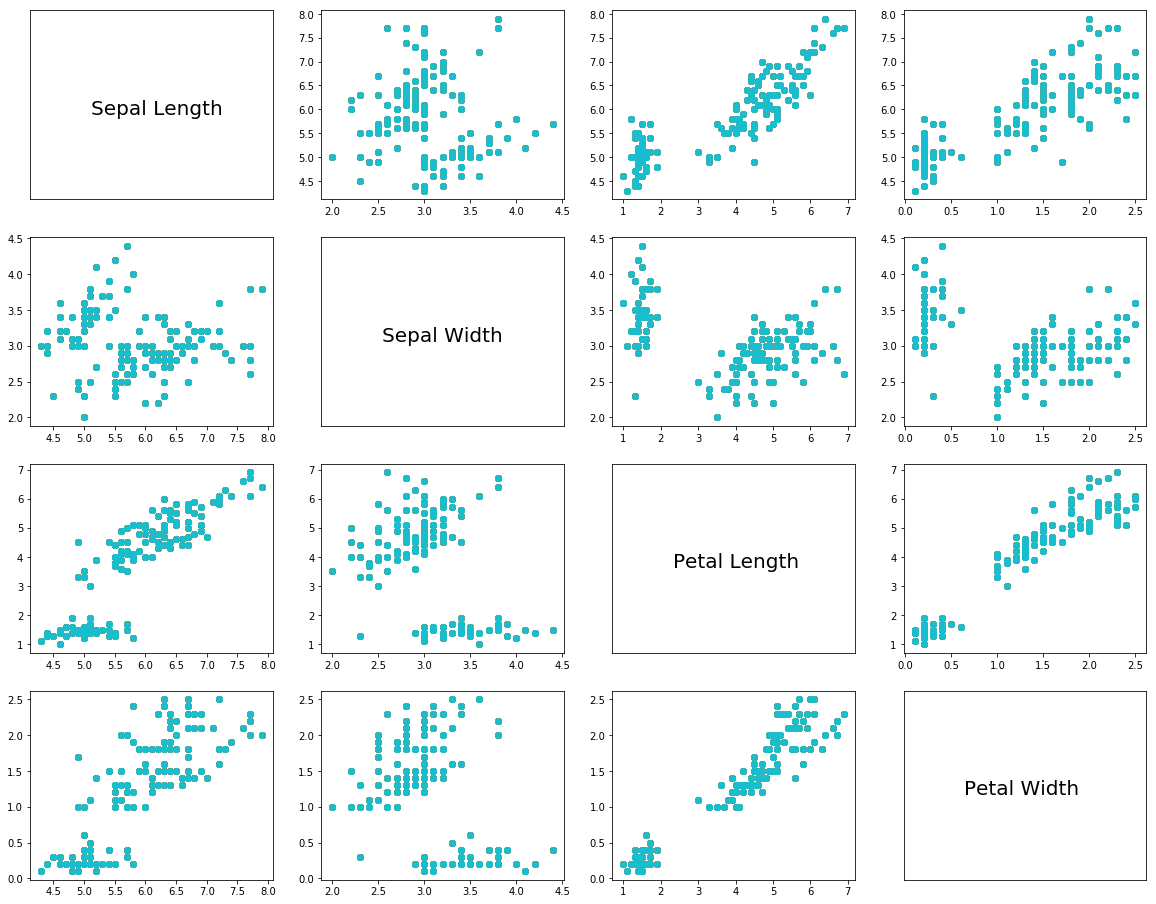

In [3]:
pairs(iris)

> <b> A plot of the linear regression models generated on each pairwise combination of features, with corresponding model statistics.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


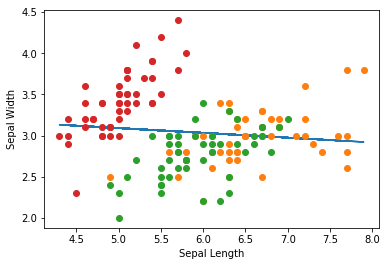

Coefficient(s):  [-0.05815723]
Residual sum of squares: 0.17
Variance score: -0.00





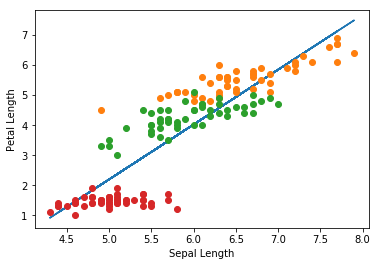

Coefficient(s):  [1.82430379]
Residual sum of squares: 0.83
Variance score: 0.71





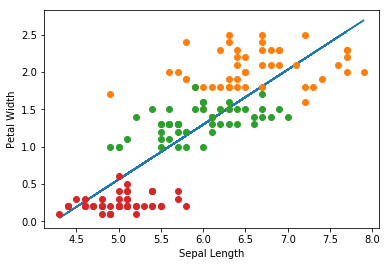

Coefficient(s):  [0.73579006]
Residual sum of squares: 0.18
Variance score: 0.70





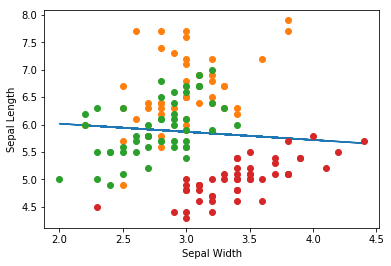

Coefficient(s):  [-0.14830145]
Residual sum of squares: 0.61
Variance score: 0.02





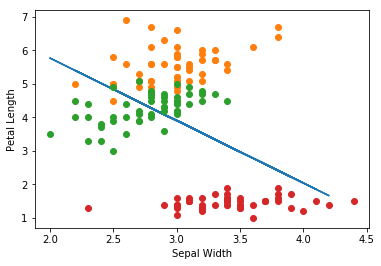

Coefficient(s):  [-1.8668708]
Residual sum of squares: 3.04
Variance score: 0.07





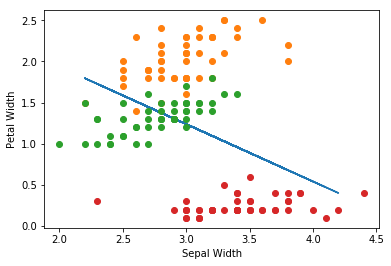

Coefficient(s):  [-0.696781]
Residual sum of squares: 0.47
Variance score: 0.06





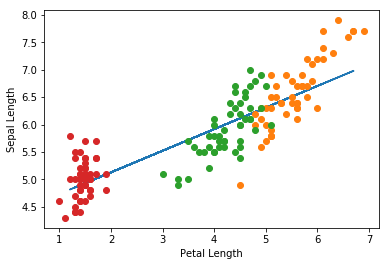

Coefficient(s):  [0.39316046]
Residual sum of squares: 0.20
Variance score: 0.78





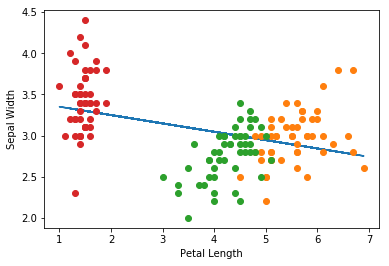

Coefficient(s):  [-0.1013245]
Residual sum of squares: 0.16
Variance score: 0.18





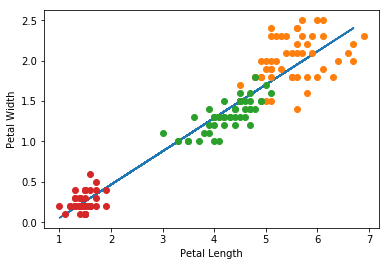

Coefficient(s):  [0.41203331]
Residual sum of squares: 0.04
Variance score: 0.93





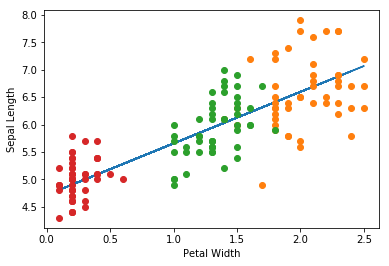

Coefficient(s):  [0.93886782]
Residual sum of squares: 0.24
Variance score: 0.57





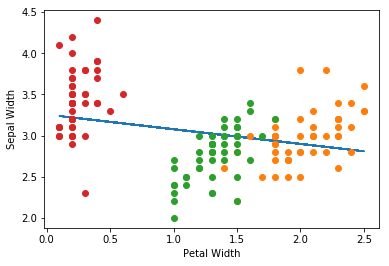

Coefficient(s):  [-0.17807892]
Residual sum of squares: 0.14
Variance score: 0.20





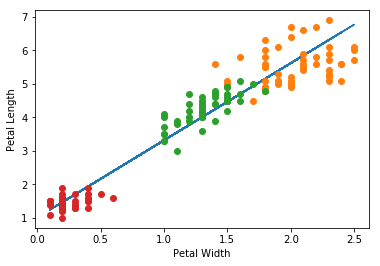

Coefficient(s):  [2.30371872]
Residual sum of squares: 0.26
Variance score: 0.91





In [67]:
import sklearn.cross_validation as cv
import sklearn.linear_model as lm
import numpy as np

def plot_and_statistics(iris, feature1, feature2):
    feature1 = feature1[0]
    feature2 = feature2[0]
    train_set, test_set = cv.train_test_split(iris)
    regr = lm.LinearRegression()
    colx_train = train_set.iloc[:, feature1]
    coly_train = train_set.iloc[:, feature2]
    colx_test = test_set.iloc[:, feature1]
    coly_test = test_set.iloc[:, feature2]
    
    colx_train = colx_train.reshape(-1, 1)
    colx_test = colx_test.reshape(-1, 1)

    regr = regr.fit(colx_train, coly_train)
    pl.plot(colx_train, regr.predict(colx_train))
    for name in set(iris['Species']):
        cond = iris['Species'] == name
        pl.plot(iris.iloc[:, feature1][cond], iris.iloc[:, feature2][cond], linestyle='none', marker='o', label=name)

    label = iris.columns[feature1]
   

    pl.xlabel(label)
    pl.ylabel(iris.columns[feature2])

    pl.show()

    # The coefficient(s).
    print ("Coefficient(s): ", regr.coef_)

    # The mean square error.
    print ("Residual sum of squares: %.2f" % np.mean(((regr.predict(colx_test) - coly_test) ** 2)))

    # Explained variance score (1 is perfect prediction).
    print ("Variance score: %.2f" % regr.score(colx_test, coly_test))
    

for independent in range(4):
    for dependent in range(4):
        if independent != dependent:
            plot_and_statistics(iris, (independent,), (dependent,))
            print ("\n\n")

> <b> A plot of the best overall linear regression model you were able to generate using any combination of features (including the use of multiple features used in combination to predict a single feature), with corresponding model statistics.

(1, 0)
(2, 0)
(0, 1)
(2, 1)
(3, 1)
(0, 1)
(2, 3)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


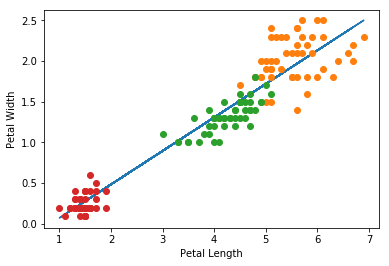

Coefficient(s):  [0.41152688]
Residual sum of squares: 0.04
Variance score: 0.93


In [74]:
import itertools as iter

def pset(lst):
    comb = (iter.combinations(lst, l) for l in range(len(lst) + 1))
    return list(iter.chain.from_iterable(comb))

def statistics(iris, feature1, feature2):
    
    feature1 = feature1[0]
    feature2 = feature2[0]
    train_set, test_set = cv.train_test_split(iris)
    regr = lm.LinearRegression()
    colx_train = train_set.iloc[:, feature1]
    coly_train = train_set.iloc[:, feature2]
    colx_test = test_set.iloc[:, feature1]
    coly_test = test_set.iloc[:, feature2]
    
    colx_train = colx_train.reshape(-1, 1)
    colx_test = colx_test.reshape(-1, 1)

    regr = regr.fit(colx_train, coly_train)

    # The mean square error.
    mse = np.mean(((regr.predict(colx_test) -coly_test) ** 2))

    return (mse, (feature1, feature2))

best_mse = float("inf")
best_feats = None
for dependent in range(4):
    independents = []
    for independent in range(4):
        if dependent != independent:
            independents.append(independent)
    for s in pset(independents):
        if s:
            (mse, (feature1, feature2)) = statistics(iris, s, (dependent, ))
            if mse < best_mse:
                best_mse = mse
                best_feats = (feature1, feature2)
                print(best_feats)

plot_and_statistics(iris, best_feats[0:], best_feats[1:])

1. Based upon the linear models you generated, which pair of features appear to be most predictive for one another? Note that you can answer this question based upon the output provided for the linear models.
> From the above plots it is clear that the pair of features which appear to be most predictive for one another is <b>"Petal Length and Petal Width"</b>.

2. Suppose you tried to generate a classification model on this dataset, but only after removing the feature that you were best able to predict based upon other features. How would removing this feature affect the classification performance?

> Removing the best predicted feature, i.e petal width might not have any significant effect on the performance of the classification model, as we know that predictibility from other features means it is redundant with respect to the other features. In other words, the majority of information that we can obtain from petal width can also be obtained by somw combination of other three features.